# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [9]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/데이터/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [10]:
#필요한 모듈 불러오기
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [11]:
#릿지모델 생성 및 훈련
model=Ridge(alpha=0.3)
model.fit(X_train,y_train)
#예측값 구하기
y_pred= model.predict(X_test)
import numpy as np
#구한 예측값을 활용해 최종적으로 전복의 나이 예측
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [12]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [17]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  model= Ridge(alpha=alpha)
  neg_mse_scores=cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
  rmse_scores= np.sqrt(-neg_mse_scores)
  mean_rmse_lst= []
  mean_rmse_lst.append(rmse_scores)
  mean_rmse= np.mean(mean_rmse_lst)
  print(f'Alpha : {alpha}, Mean RMSE: {mean_rmse}')
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산


Alpha : 0, Mean RMSE: 2.1999225344893665
Alpha : 0.1, Mean RMSE: 2.1875184113588784
Alpha : 1, Mean RMSE: 2.1716204485916846
Alpha : 10, Mean RMSE: 2.3047703799507624
Alpha : 100, Mean RMSE: 2.5601375138777884


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [18]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [19]:
#모델 생성 및 훈련
model= XGBRegressor()
model.fit(X_train, y_train)

#예측값 구하기
y_pred= model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측


#MSE와 RMSE 구하기
mse=mean_squared_error(y_pred, y_test)
rmse= np.sqrt(mse)

In [20]:
print(mse)
print(rmse)

5.89680437351158
2.4283336618989533


In [23]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

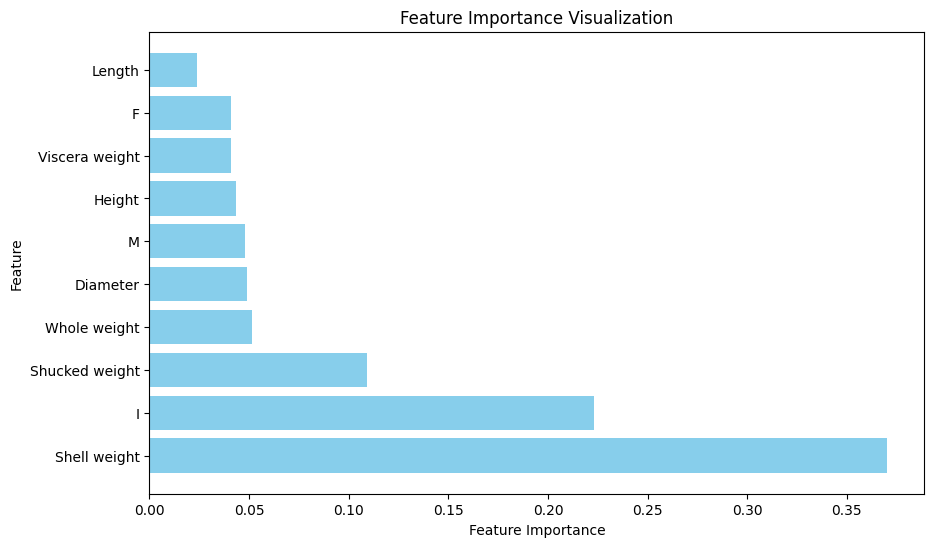

In [30]:
import seaborn as sns
%matplotlib inline

feature_importances_= model.feature_importances_

features= data.columns

df= pd.DataFrame({'Feature': features,
                  'Importances': feature_importances_})
df=df.sort_values(by='Importances', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(df['Feature'], df['Importances'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Visualization')
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [31]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [32]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [34]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape)
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()

In [37]:
logmodel.fit(x_train, y_train)
y_pred= logmodel.predict(x_test)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [38]:
#기울기
coef=logmodel.coef_
print(coef)

[[-1.99751227e-01  3.65450758e-01  1.49472196e-01 -1.88027165e-01
  -2.28495279e-02  1.95456589e-01  4.66701510e-01 -1.66796736e-02
   8.23897555e-02  6.75012051e-02 -1.92621931e-02  2.94915906e-01
   7.42523456e-03]
 [ 5.96476071e-01 -7.88673050e-01 -1.26181507e-01  2.12254576e-01
  -1.13504552e-02  3.15786080e-01  3.55148166e-01  3.34675705e-02
   2.79035814e-01 -1.17202539e+00  2.61165812e-01  4.64731786e-01
  -8.33633370e-03]
 [-3.96724844e-01  4.23222292e-01 -2.32906893e-02 -2.42274112e-02
   3.41999831e-02 -5.11242669e-01 -8.21849677e-01 -1.67878969e-02
  -3.61425569e-01  1.10452419e+00 -2.41903619e-01 -7.59647692e-01
   9.11099142e-04]]


In [39]:
#절편
intercept= logmodel.intercept_
print(intercept)

[-0.04177839  0.0955105  -0.05373211]


3-3) 모델의 정확도를 구하세요.

In [42]:
#모델의 예측값 구하기
print(y_pred)
#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)


[2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 1 0 0 0 0 2 1 2 1 1
 0 1 1 2 2 0 0 1 0 0 1 1 1 1 2 2 1]
0.9629629629629629
